In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [2]:
N=100
dx=1/N
x=np.linspace(0,1,N+1)
%matplotlib inline

In [3]:
def mL2V(x):
    return 0*x

In [97]:
def she_1d(x,n):
    V=mL2V(x)
    plt.grid()
    plt.plot(x,V)
    d =  1/dx**2 + mL2V(x)[1:-1] #dont take the first and last point
    e =  (-0.5/(dx**2))*np.ones(len(d)-1)
    w,v = eigh_tridiagonal(d,e)
    
    plt.figure()
    for i in range(n):
        plt.plot(v.T[i])
    plt.figure()
    plt.bar(np.arange(0, n, 1), w[0:n])
    plt.ylabel('$mL^2 E/\hbar^2$')
    return w,v

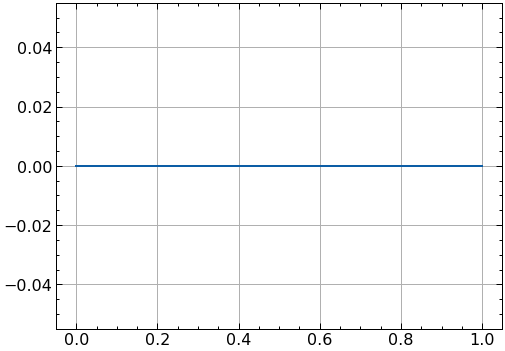

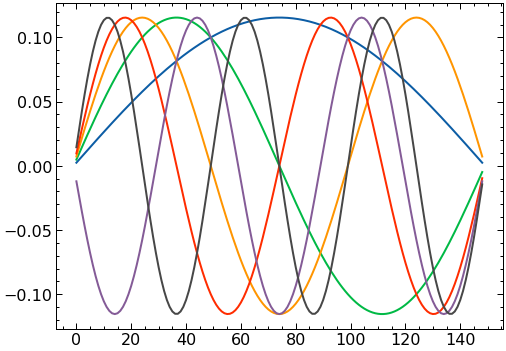

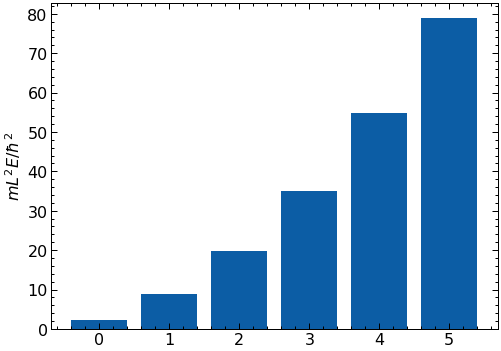

In [98]:
x1=np.linspace(0,1,N+1)
w1,v1= she_1d(x1,6)

In [99]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
plt.style.use(['science', 'notebook'])
from scipy import sparse

In [100]:
N = 150
X1, X2 = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))

In [101]:
def get_potential(x,y):
    return 0*x
#def get_potential(x, y):
#    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V = get_potential(X1,X2)

In [102]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [106]:
nn=10
eigenvalues, eigenvectors = eigsh(H, k=nn, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

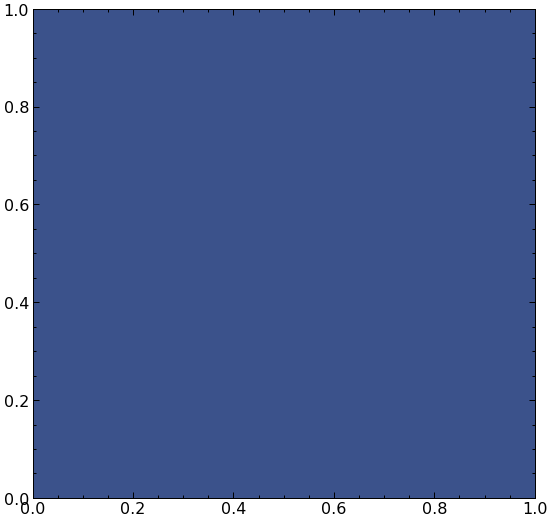

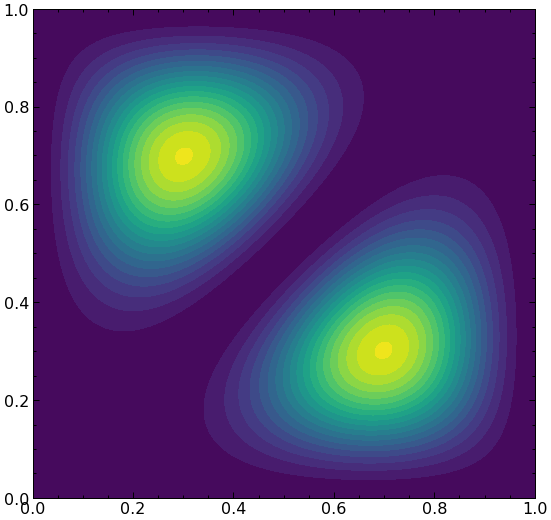

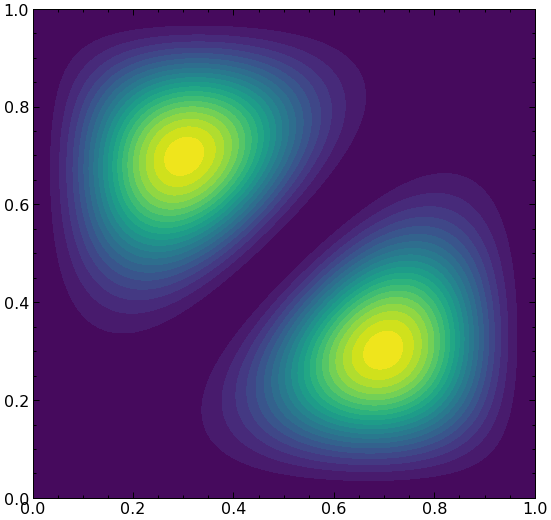

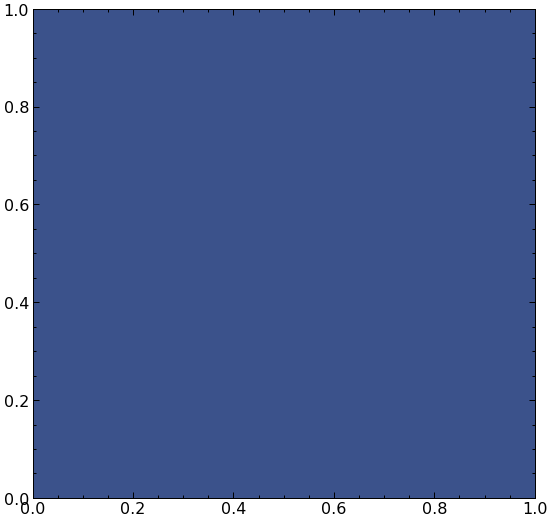

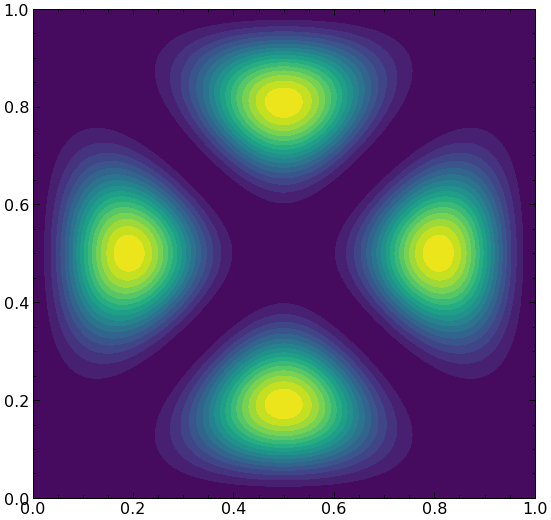

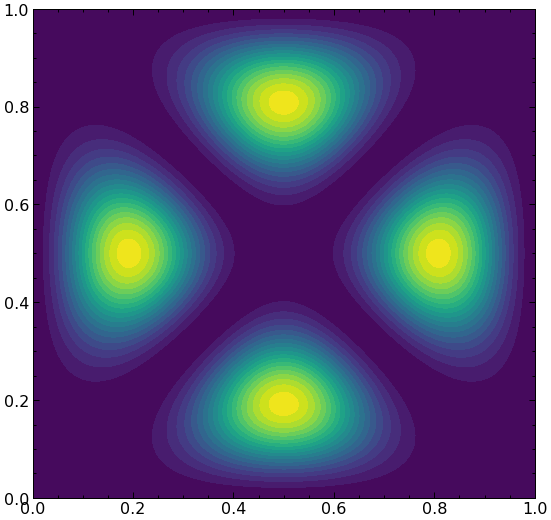

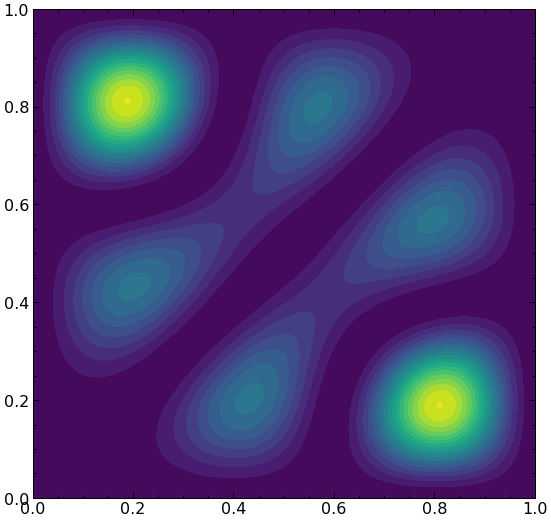

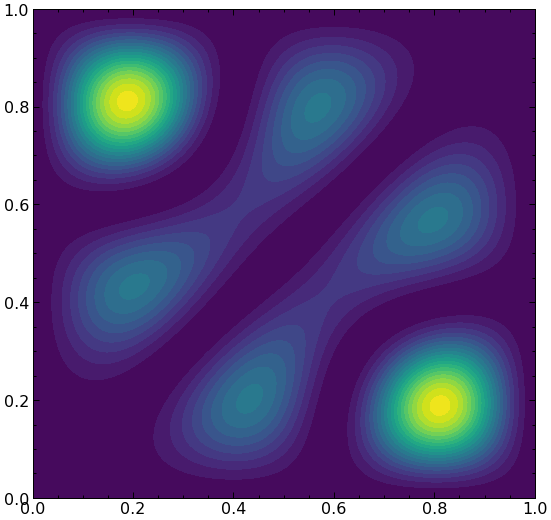

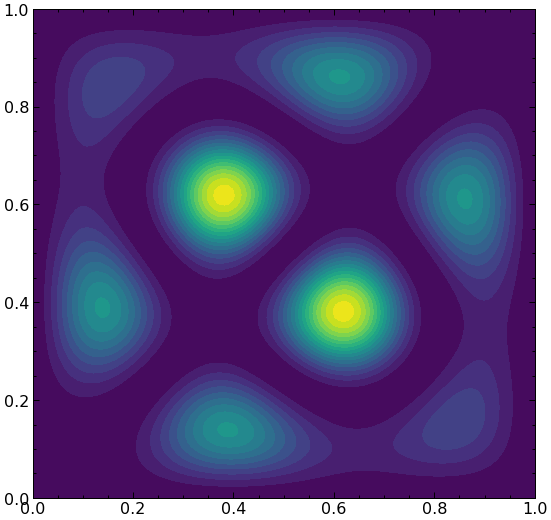

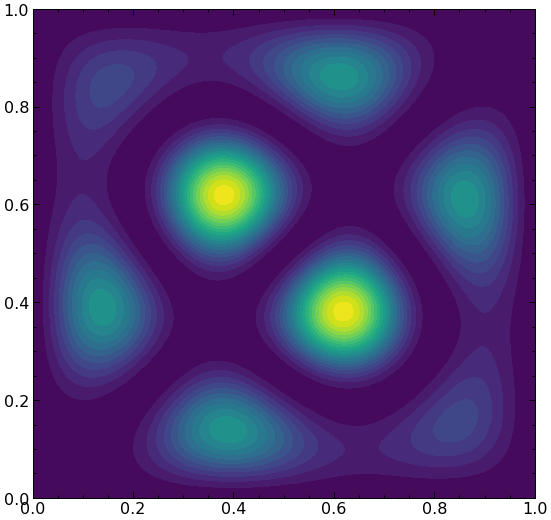

In [108]:
#for i in range(1):
nn
for i in range(nn):
    a = (get_e(i) - get_e(i).swapaxes(0,1))/np.sqrt(2)
    for k in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[k,j]*a[k,j]<10**(-15):
                a[k,j]=0
    plt.figure(figsize=(9,9))
    plt.contourf(X1, X2, a**2, 20)

<BarContainer object of 10 artists>

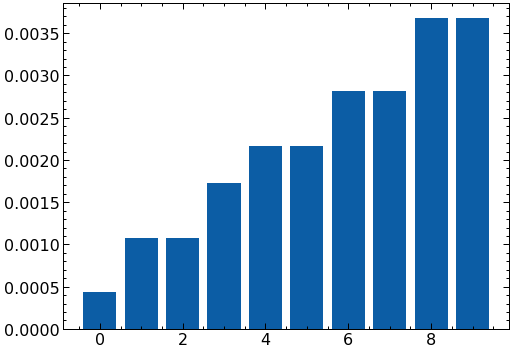

In [110]:
plt.bar(np.arange(0, nn, 1), eigenvalues[0:nn])

[[1.00000000e-05 6.71140940e-03 1.34228188e-02 ... 9.86577181e-01
  9.93288591e-01 1.00000000e+00]
 [6.71140940e-03 1.00000000e-05 6.71140940e-03 ... 9.79865772e-01
  9.86577181e-01 9.93288591e-01]
 [1.34228188e-02 6.71140940e-03 1.00000000e-05 ... 9.73154362e-01
  9.79865772e-01 9.86577181e-01]
 ...
 [9.86577181e-01 9.79865772e-01 9.73154362e-01 ... 1.00000000e-05
  6.71140940e-03 1.34228188e-02]
 [9.93288591e-01 9.86577181e-01 9.79865772e-01 ... 6.71140940e-03
  1.00000000e-05 6.71140940e-03]
 [1.00000000e+00 9.93288591e-01 9.86577181e-01 ... 1.34228188e-02
  6.71140940e-03 1.00000000e-05]]


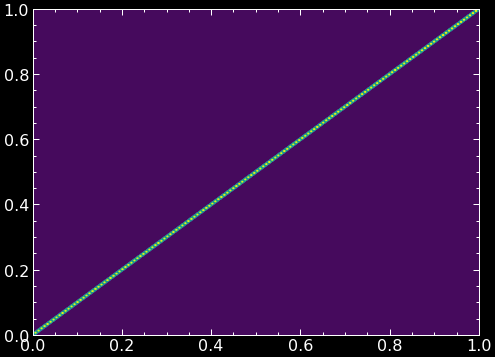

In [230]:
N = 150
X1, X2 = np.meshgrid(np.linspace(0,1,N, dtype=float),
                   np.linspace(0,1,N, dtype=float))
def get_potential(x,y):
    r = np.abs(x - y)
    r = np.where(r < 10**(-5), 10**(-5), r)
    V = 1/ r
    print(r)
    return V,r
#def get_potential(x, y):
#    return np.exp(-(x-0.3)**2/(2*0.1**2))*np.exp(-(y-0.3)**2/(2*0.1**2))
V,rr = get_potential(X1,X2)
plt.contourf(X1, X2, V, 20)

In [231]:
#plt.imshow(rr)
np.min(rr)


1e-05

In [232]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags, np.array([-1,0,1]), N, N)
T = -1/2 * sparse.kronsum(D,D)
U = sparse.diags(V.reshape(N**2), (0))
H = T+U

In [233]:
nn=10
eigenvalues, eigenvectors = eigsh(H, k=nn, which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N))

/Users/pranavkairon/opt/anaconda3/envs/pyhome/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


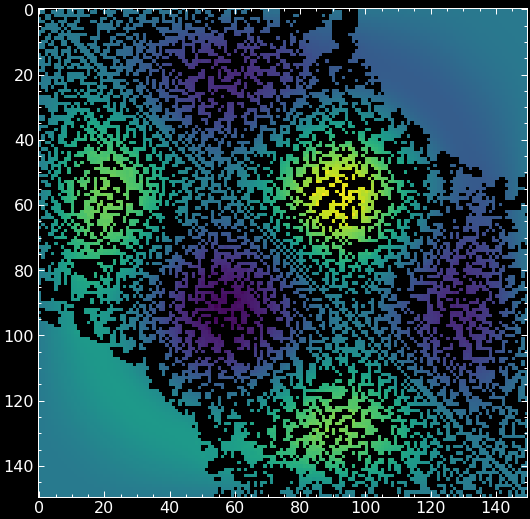

In [234]:
plt.figure(figsize=(9,9))
X11, X22 = np.meshgrid(np.linspace(-5,5,N, dtype=float),
                   np.linspace(-5,5,N, dtype=float))

plt.imshow(get_e(0)**a)

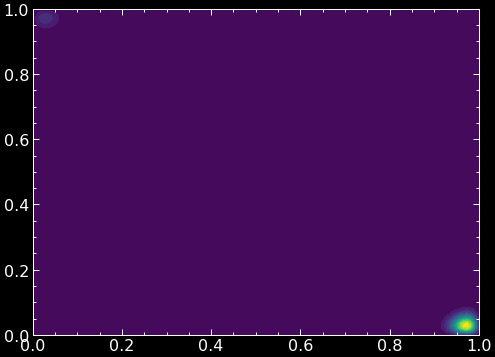

In [235]:
plt.contourf(X1, X2, get_e(0)**2, 20)

<BarContainer object of 10 artists>

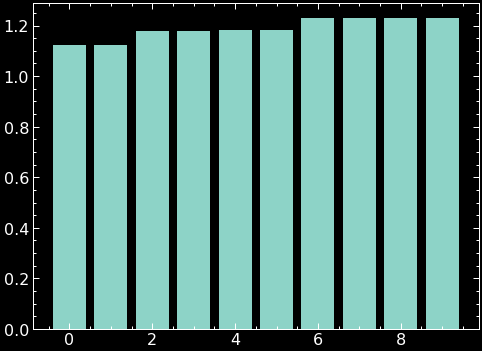

In [236]:
plt.bar(np.arange(0, nn, 1), eigenvalues[0:nn])

In [130]:
# #for i in range(1):
# nn
# for i in range(nn):
#     a = (get_e(i) - get_e(i).swapaxes(0,1))/np.sqrt(2)
#     for k in range(a.shape[0]):
#         for j in range(a.shape[1]):
#             if a[k,j]*a[k,j]<10**(-15):
#                 a[k,j]=0
#     plt.figure(figsize=(9,9))
#     plt.contourf(X1, X2, a**2, 20)

Computing...
Took 4.952095985412598
[ 74.30946056  86.47923218  87.65824081  98.56925689  99.0884984
 102.26342055 110.63536476 110.8566912  114.24215729 117.3475797
 122.84096823 122.91958649 126.93715735 129.36071401 133.34212479
 135.31139062 135.35004774 140.17625247 142.06642698 145.66984091
 148.14176922 148.17479888 150.30732034 153.90838711 155.33310316
 158.75356547 161.38251355 161.43973041 163.04102252 168.09697795
 168.2359339  169.16161218 172.48078867 175.07204343 175.1728133
 176.560381   181.38486792 182.72918636 183.48614116 186.79182814
 187.31676237 189.24412743 189.40225753 190.73522747 195.3136537 ]


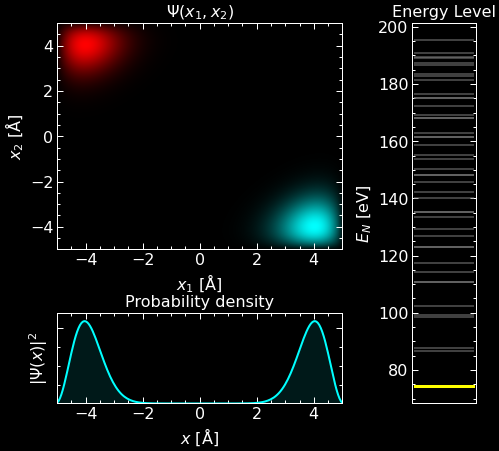

In [133]:
import numpy as np
from qmsolve import Hamiltonian, TwoFermions, init_visualization,Å


def harmonic_interaction(fermions):

	k = 0.5

	l0 = 5 # measured in Å
	V = 0.5*k*(fermions.x1 - fermions.x2 - l0) **2
	return V



def coulomb_interaction(fermions):

	k = 34.
	r = np.abs(fermions.x1 - fermions.x2)
	r = np.where(r < 0.0001, 0.0001, r)
	V = k/ r
	return V

H = Hamiltonian(particles = TwoFermions(), 
				potential = coulomb_interaction, # change this to harmonic_interaction to check what happens!
				spatial_ndim = 1, N = 200, extent = 10*Å)


eigenstates = H.solve(max_states = 90)
print(eigenstates.energies)

visualization = init_visualization(eigenstates)

visualization.slider_plot()
#visualization.animate()

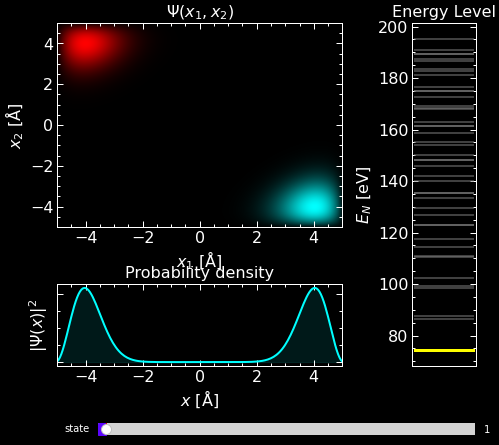

In [134]:
visualization.slider_plot()

In [238]:
!pip install nbconvert